4. Parameter estimation by gradient method

In [2]:
import numpy as np
import matplotlib.pyplot as plt 

4.3 Steepest descent method

In [1]:
# minimize f(x) = 0.5 * x^2 - 5 * x + 13.5 by steepest descent method

def f(x):
    return 0.5 * x ** 2 - 5 * x + 13.5

def g(x):
    # f'(x)
    return x - 5

def steepest_descent(f, g, x0=0.0, lr=0.01, eps=1e-4):
    # f : target function to minimize
    # g : f'(x)
    # x0 : the initial value of x
    # lr : learning rate
    # eps : stop loop when |g| < eps
    x = x0
    t = 1
    H = [] # List of (xt, f(xt), f'(xt))
    while True:
        gx = g(x)
        H.append(dict(t=t, x=x, fx=f(x), gx=gx))
        if abs(gx) < eps:
            break
        x -= lr * gx
        t += 1
    return H

In [4]:
H = steepest_descent(f, g, x0=9, lr=0.5)
print(H[-1])

{'t': 17, 'x': 5.00006103515625, 'fx': 1.0000000018626451, 'gx': 6.103515625e-05}


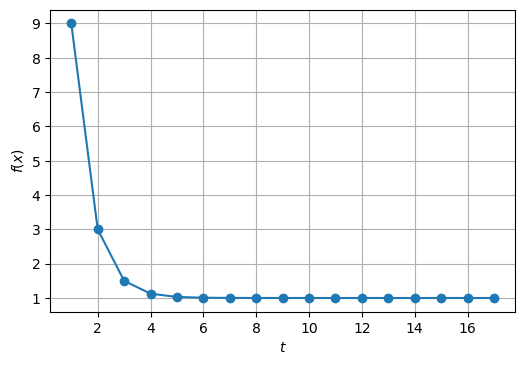

In [5]:
fig, ax = plt.subplots(dpi=100)
ax.plot(
    [h['t'] for h in H],
    [h['fx'] for h in H],
    'o-'
)
ax.set_xlabel('$t$')
ax.set_ylabel('$f(x)$')
ax.grid()

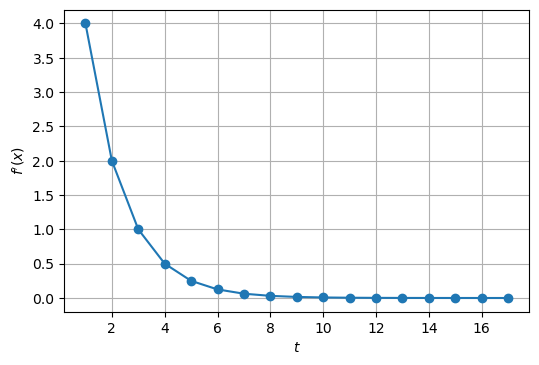

In [6]:
fig, ax = plt.subplots(dpi=100)
ax.plot(
    [h['t'] for h in H],
    [h['gx'] for h in H],
    'o-'
)
ax.set_xlabel('$t$')
ax.set_ylabel("$f'(x)$")
ax.grid()

4.4 Estimate parameters by steepest descent method

In [7]:
D = np.array([[1, 3], [3, 6], [6, 5], [8, 7]])

In [9]:
# fit y = ax + b to D
max_epochs = 10000
lr = 0.001
eps = 1e-4

X = np.vstack([D[:, 0], np.ones_like(D[:, 0])]).T
y = D[:, 1]
w = np.zeros(X.shape[1])

for t in range(max_epochs):
    y_hat = X @ w
    grad = 2 * X.T @ (y_hat - y)
    if np.sum(np.abs(grad)) < eps:
        break
    w -= lr * grad

print(f'w : {w}')
print(f't : {t}')

w : [0.43104138 3.31030308]
t : 5464


4.6 stochastic gradient descent

In [11]:
D = np.array([[1, 3], [3, 6], [6, 5], [8, 7]])

In [12]:
max_epochs = 40000
lr0 = 0.03 # initial learning rate
eps = 1e-4

X = np.vstack([D[:, 0], np.ones_like(D[:, 0])]).T
y = D[:, 1]
w = np.zeros(X.shape[1])

for t in range(max_epochs):
    lr = lr0 / np.sqrt(1+t)
    i = np.random.randint(0, X.shape[0])
    y_hat = np.dot(X[i], w)
    grad = 2 * (y_hat - y[i]) * X[i]
    if np.sum(np.abs(grad)) < eps:
        break
    w -= lr * grad

print(f'w : {w}')
print(f't : {t}')

w : [0.44551964 3.30218049]
t : 39999


4.9 Exercise

In [13]:
X = np.array([ 0.  ,  0.16,  0.22,  0.34,  0.44,  0.5 ,  0.67,  0.73,  0.9 ,  1.  ])
Y = np.array([-0.06,  0.94,  0.97,  0.85,  0.25,  0.09, -0.9 , -0.93, -0.53,  0.08])

In [51]:
def show_graph(X, Y, x, y):
    # (X, Y) : data
    # (x, y) : regression line
    fig, ax = plt.subplots(dpi=100)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.grid()
    ax.scatter(X, Y, marker='.')
    ax.plot(x, y, 'r')
    fig.show()


# fit polynomial function to X and Y
# Ridge regression with SGD method
# d = degree of polynomial
def ridge_sgd(X, Y, d=1, alpha=1e-4, max_epochs=400000, lr0=0.03, eps=1e-8):
    design_T = np.ones_like(X)
    for i in range(1, d+1):
        design_T = np.vstack([design_T, X ** i])
    design = design_T.T
    
    N = design.shape[0]
    w = np.zeros(design.shape[1])
    for t in range(max_epochs):
        # lr = lr0 / np.sqrt(1+t)
        lr = lr0
        i = np.random.randint(0, N)
        y_hat = np.dot(design[i], w)
        grad = -2 * (Y[i] - y_hat) * design[i] + 2 * alpha * w / N
        if np.sum(np.abs(grad)) < eps:
            break
        w -= lr * grad

    print(f'w : {w}')
    print(f't : {t}')
    x = np.linspace(0, 1, 1000)
    y = np.zeros_like(x)
    for i in range(d+1):
        y += w[i] * (x ** i)
    show_graph(X, Y, x, y)


w : [  0.02679651   7.88323534 -17.94669688  -0.63150487   8.41551286
   6.14442646  -3.73351187]
t : 399999


<ipython-input-51-9efe980e2135>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


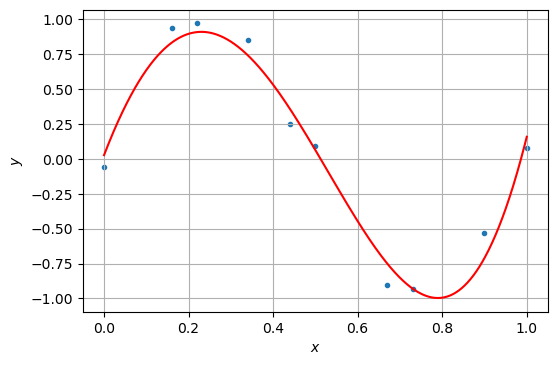

In [54]:
ridge_sgd(X, Y, d=6, alpha=1e-4)